# Exodus wallet Transaction history Analysis

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Convert into a pandas dataframe
data = pd.read_csv('exodus_0-all-txs-2024-09-20_21-17-11 - Copy.csv')


In [62]:
# Clean the data by dropping rows with NaN values and removing unnecessary blanks
cleaned_data = data.dropna(how='all')  # Drop rows where all values are NaN
cleaned_data = cleaned_data.dropna(subset=['FROMPORTFOLIO', 'TOPORTFOLIO', 'OUTAMOUNT', 'INAMOUNT'], how='all')  # Drop rows with NaN in key columns


In [64]:
# Remove any blank spaces from string columns
cleaned_data = cleaned_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)



In [66]:
# Remove columns with sensitive or incomplete data (wallet addresses, transaction IDs, URLs)
columns_to_remove = ['TOADDRESS', 'OUTTXID', 'OUTTXURL', 'INTXID', 'INTXURL', 'ORDERID', 'PERSONALNOTE', 'Unnamed: 17']
cleaned_data = cleaned_data.drop(columns=columns_to_remove)

In [81]:

# Filter relevant columns for analysis (inflows and outflows)
relevant_data = cleaned_data[['DATE', 'TYPE', 'OUTAMOUNT', 'INAMOUNT', 'OUTCURRENCY', 'INCURRENCY']]
display(relevant_data)

,DATE,TYPE,OUTAMOUNT,INAMOUNT,OUTCURRENCY,INCURRENCY
0,2021-06-16T23:12:10.000Z,deposit,NaN,18.836530,NaN,ADA
1,2021-06-16T23:15:31.000Z,deposit,NaN,275.614078,NaN,ADA
2,2021-06-16T23:16:15.000Z,deposit,NaN,0.000000,NaN,ADA
3,2021-06-16T23:25:35.000Z,deposit,NaN,0.007269,NaN,BTC
4,2021-06-16T23:26:01.000Z,deposit,NaN,0.281334,NaN,ETH
...,...,...,...,...,...,...
311,2024-09-05T16:21:16.000Z,withdrawal,-0.083239,NaN,ETH,NaN
312,2024-09-09T19:28:22.000Z,withdrawal,-0.003455,NaN,BTC,NaN
313,2024-09-19T21:24:34.000Z,withdrawal,0.000000,NaN,ETH,NaN
314,2024-09-20T00:18:09.000Z,withdrawal,-0.001054,NaN,BTC,NaN


Summarize Inflows and Outflows by Time
First, ensure the DATE column is in a datetime format:

In [68]:
# Convert DATE to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract year, month, week, day for analysis
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month
data['WEEK'] = data['DATE'].dt.isocalendar().week
data['DAY'] = data['DATE'].dt.day


In [69]:
#Next, summarize the inflows (deposits) and outflows (withdrawals) on different time scales:

# Group data by year, month, week, and day

# Summarize inflows and outflows on a daily, weekly, monthly, and yearly basis
inflows = data[data['TYPE'] == 'deposit'].groupby(['YEAR', 'MONTH', 'DAY'])['INAMOUNT'].sum()
outflows = data[data['TYPE'] == 'withdrawal'].groupby(['YEAR', 'MONTH', 'DAY'])['OUTAMOUNT'].sum()

# You can similarly group by WEEK or MONTH if needed
monthly_inflows = data[data['TYPE'] == 'deposit'].groupby(['YEAR', 'MONTH'])['INAMOUNT'].sum()
monthly_outflows = data[data['TYPE'] == 'withdrawal'].groupby(['YEAR', 'MONTH'])['OUTAMOUNT'].sum()


1.3. Check the Distribution of Transaction Amounts and Frequency


C:\Users\Student\AppData\Local\Temp\ipykernel_28408\698178691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['DATE'] = pd.to_datetime(relevant_data['DATE'])


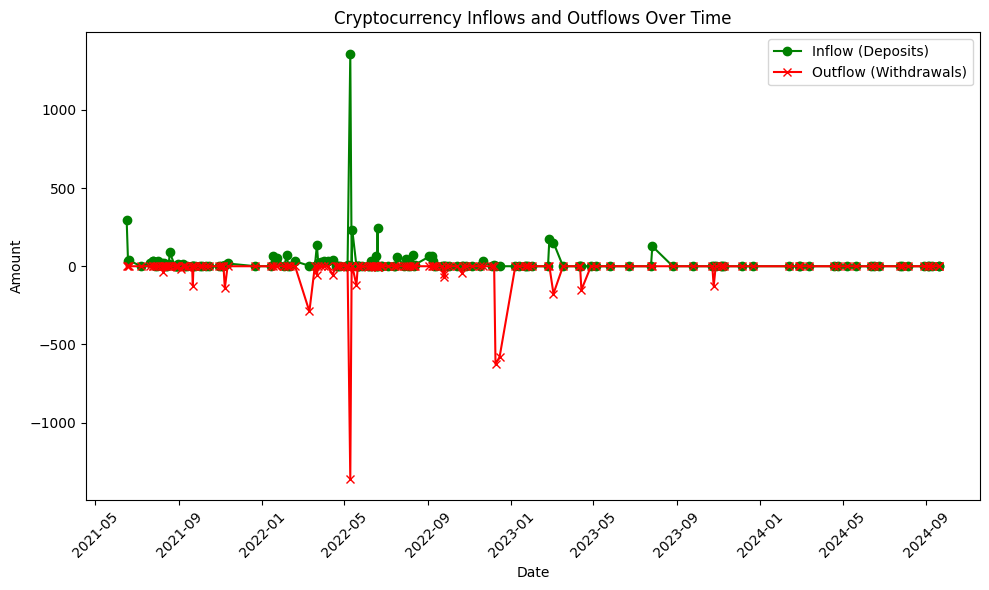

In [71]:
# Convert DATE column to datetime for time-based analysis
relevant_data['DATE'] = pd.to_datetime(relevant_data['DATE'])

# Group by date and sum the inflows and outflows (only numeric columns)
grouped_data = relevant_data.groupby(relevant_data['DATE'].dt.date)[['OUTAMOUNT', 'INAMOUNT']].sum()

# Plot inflows and outflows
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['INAMOUNT'], label='Inflow (Deposits)', color='green', marker='o')
plt.plot(grouped_data.index, grouped_data['OUTAMOUNT'], label='Outflow (Withdrawals)', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Cryptocurrency Inflows and Outflows Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

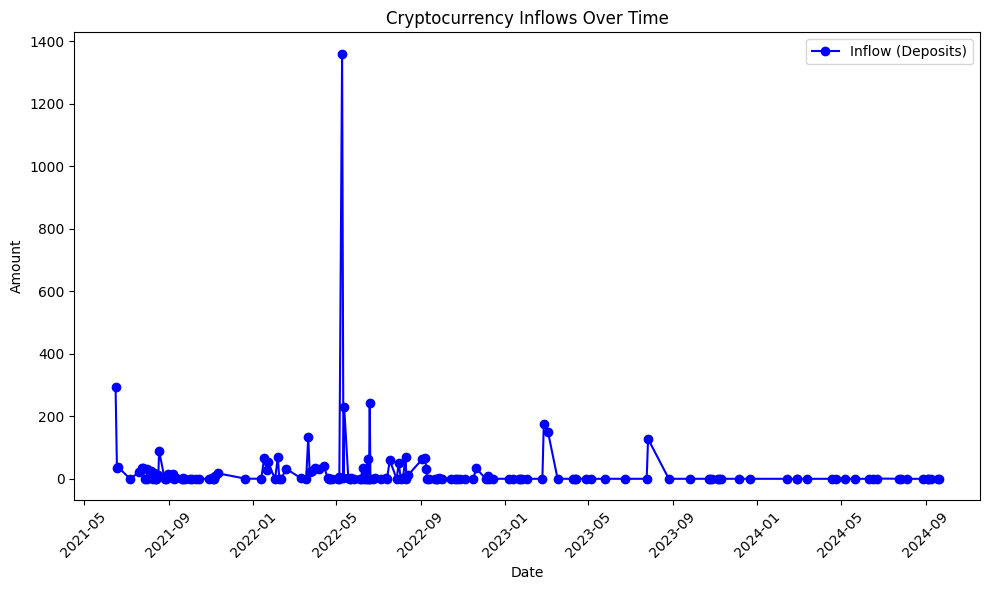

In [76]:
# Plot inflows
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['INAMOUNT'], label='Inflow (Deposits)', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Cryptocurrency Inflows Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

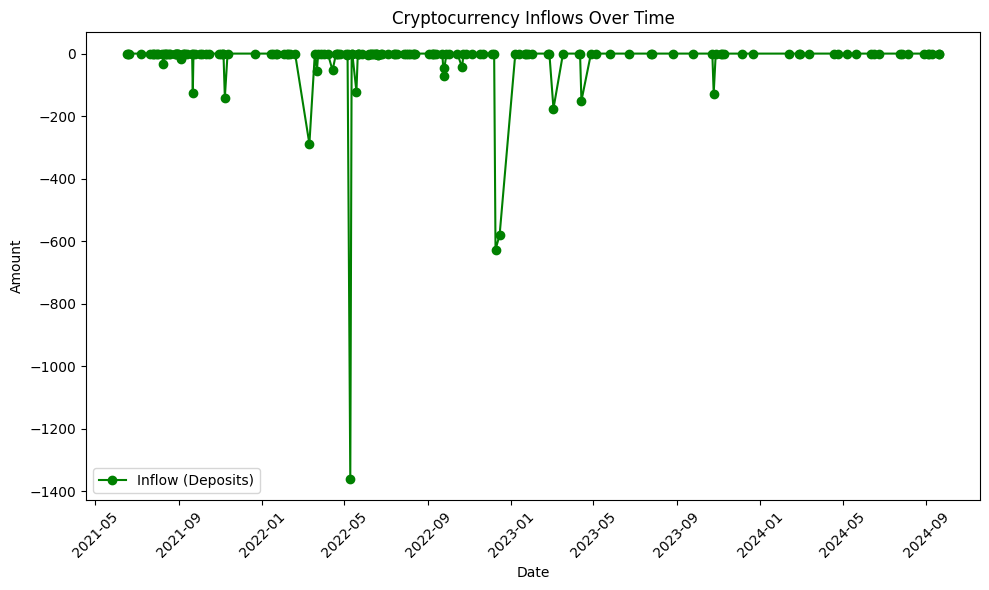

In [74]:
# Plot inflows and outflows
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data['OUTAMOUNT'], label='Inflow (Deposits)', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Cryptocurrency Outflows Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

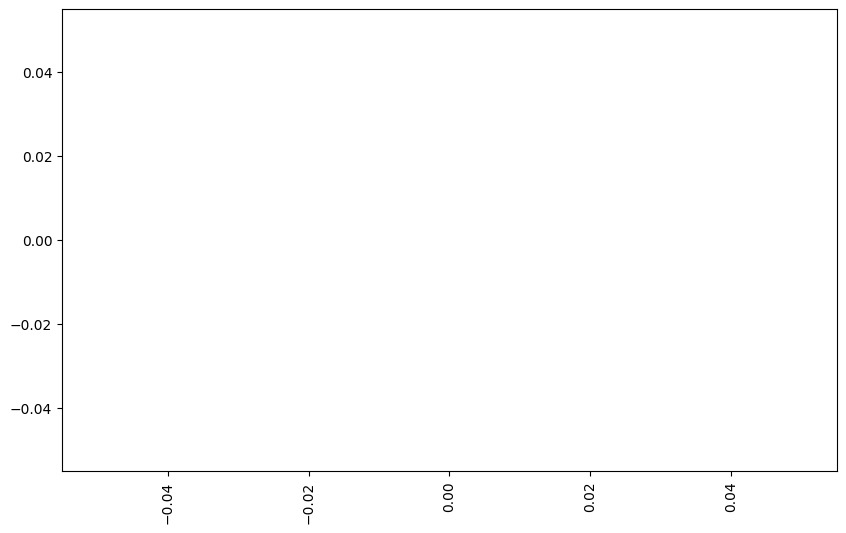

In [79]:
# Create a pivot table with cryptocurrencies as columns
crypto_inflows = inflows.pivot_table(index=None, columns='INCURRENCY', aggfunc='size', fill_value=0)

# Create a bar chart of the different cryptocurrency inflows
plt.figure(figsize=(10, 6))
crypto_inflows.plot(kind='bar')
plt.title('Cryptocurrency Inflows')
plt.xlabel('Cryptocurrency')
plt.ylabel('Number of Inflows')
plt.xticks(rotation=0)  # No rotation needed since labels are short
plt.show()

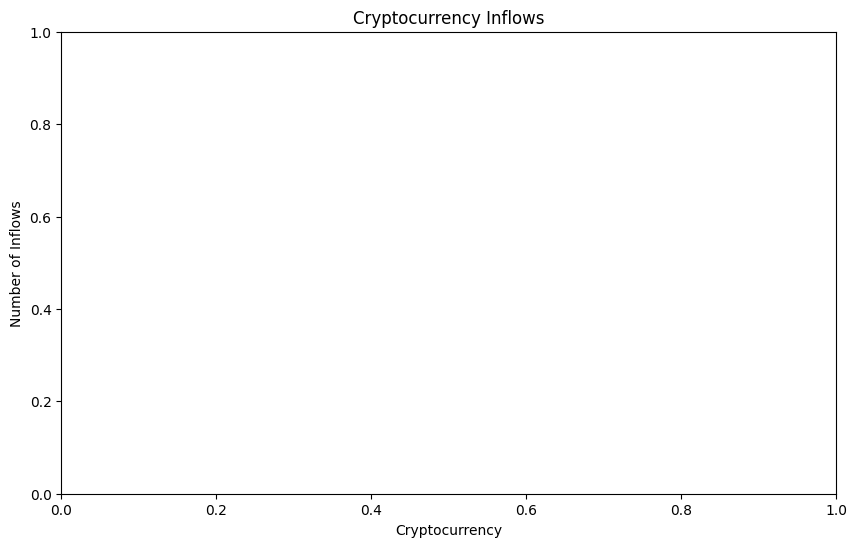

In [80]:
# Create a bar chart of the different cryptocurrency inflows
plt.figure(figsize=(10, 6))
sns.countplot(x='INCURRENCY', data=inflows)
plt.title('Cryptocurrency Inflows')
plt.xlabel('Cryptocurrency')
plt.ylabel('Number of Inflows')
plt.xticks(rotation=0)  # No rotation needed since labels are short
plt.show()